#  Midterm Part 2

## By: Cambrey Sullivan

In [82]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import bokeh
import seaborn as sns
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap
from bokeh.plotting import figure, show, output_file

df = pd.read_csv('E:/Python/Midterm/AmesHousing.csv')

quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

variable_names = list(df.columns.values)
variable_names.remove('SalePrice')
variable_names.remove('Id')


### Ames Housing Dataset

The data is extracted from Kaggle's "House Prices" competition. It is comprised of final prices of homes in Ames, Iowa, and 79 explanatory variables from 2006 to 2010. The data was compiled by Dean De Cock for the purpose of teaching data science. Potentially, the data could be used to predict final sales prices in the area given particular features in the house. 

More information about the dataset can be found here: http://www.amstat.org/publications/jse/v19n3/decock.pdf

As we can see from Figure 1, there are many missing values in the dataset. However, as much of the missing data is because the feature is not present, the missing values don't need to be adjusted.

Text(0,-100,'Figure 1')

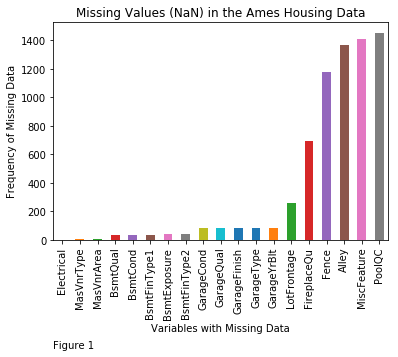

In [102]:
NaN = df.isnull().sum()
NaN = NaN[NaN > 0]
NaN.sort_values(inplace=True)
NaN.plot.bar()
plt.title("Missing Values (NaN) in the Ames Housing Data")
plt.xlabel("Variables with Missing Data")
plt.ylabel("Frequency of Missing Data")
plt.annotate('Figure 1', (0,0), (0, -100), xycoords='axes fraction', textcoords='offset points', va='top')

The following table provides a summary of the data, and figure after is the distribution of the sales prices.

In [40]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


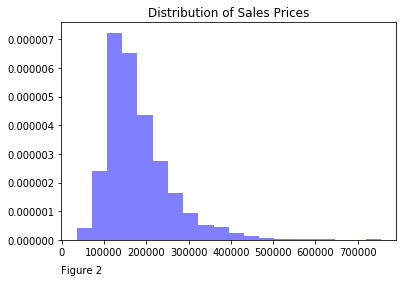

In [101]:
plt.hist(df['SalePrice'], bins=20, density=1, facecolor='blue', alpha=0.5)
plt.title("Distribution of Sales Prices")
plt.annotate('Figure 2', (0,0), (0, -25), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [69]:
for variable_names in quantitative:
    dist_not_normal = []
    test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
    normal = pd.DataFrame(df[quantitative])
    normal = normal.apply(test_normality)
    if not normal.any():
        dist_not_normal += normal[[variable_names]]
    else:
        pass
if len(dist_not_normal) == 0:
    print("All variables are normally distributed.")
else:
    print(dist_not_normal)

All variables are normally distributed.
